In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import datetime as dt
import time
from math import radians, cos, sin, asin, sqrt

In [2]:
# functions written specifically to analyze cyclistic bike share data
from cyclistic_analysis_functions import *

In [3]:
# Bikeshare Data from January 2021 (202101) - January 2022 (202201)
date_indices = [
    '202101', '202102', '202103', '202104', '202105', '202106',
    '202107', '202108', '202109', '202110', '202111', '202112', '202201']

# DataFrame of all Bikeshare oberservations from Jan 2021 to Jan 2022
df_raw = generate_data(date_indices)

In [4]:
# generating columns of new variables using the raw data
# distance_miles, travel_time, tr_time_nano, weekday_num
df_expanded = generate_columns_pack(df_raw)
df_precleaning = df_expanded.copy()

In [5]:
df = clean_data(df_precleaning)

In [6]:
# generate dictionary of summary statistics over all the data (jan 1, 2021 - jan 31, 2022)
summary_dict = generate_overall_summary_dict(df, '2021_2022')

In [7]:
percentiles_dict = {'overall': summary_dict['percentile_dict']['overall'], 
                    'member' : summary_dict['percentile_dict']['member'],
                    'casual' : summary_dict['percentile_dict']['casual']}

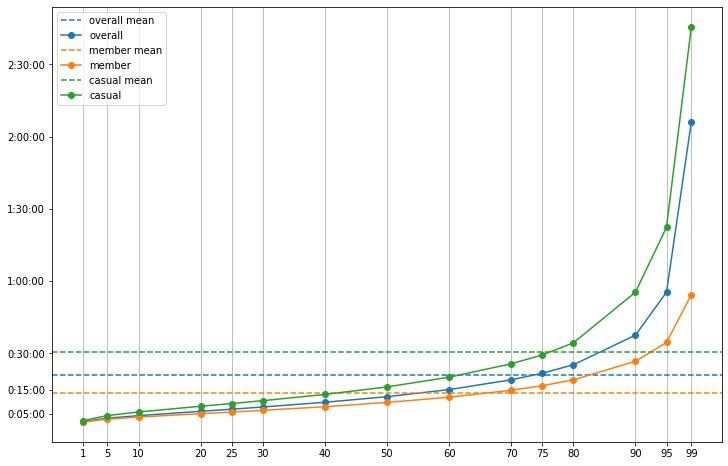

In [8]:
plot_time_percentiles(percentiles_dict)

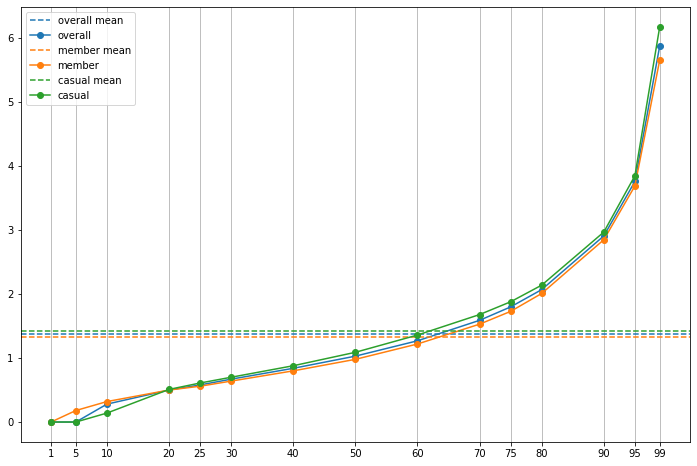

In [9]:
plot_dist_percentiles(percentiles_dict)

In [10]:
summary_dict['cnt_pcnt_stats']

{'overall': {'name': 'overall 2021_2022', 'count': 5614544, 'pcnt': 100.0},
 'casual': {'name': 'casual 2021_2022', 'count': 2511870, 'pcnt': 44.74},
 'member': {'name': 'member 2021_2022', 'count': 3102674, 'pcnt': 55.26},
 'leisure': {'name': 'leisure 2021_2022', 'count': 220533, 'pcnt': 3.93},
 'non_leisure': {'name': 'non_leisure 2021_2022',
  'count': 5352018,
  'pcnt': 95.32}}

In [11]:
stats_dict = {}
for item in percentiles_dict:
    subgroup_max_dist = percentiles_dict[item].iloc[0, -5]
    subgroup_mean_dist = percentiles_dict[item].iloc[0, -4]
    subgroup_std_dist = percentiles_dict[item].iloc[0, -3]
    subgroup_max_time = percentiles_dict[item].iloc[2, -5]
    subgroup_mean_time = percentiles_dict[item].iloc[2, -4]
    subgroup_std_time = percentiles_dict[item].iloc[2, -3]
    stats_dict[item] = {'max_dist': subgroup_max_dist, 'mean_dist': subgroup_mean_dist, 'std_dist': subgroup_std_dist,
                        'max_time': subgroup_max_time, 'mean_time': subgroup_mean_time, 'std_time': subgroup_std_time}
    
pd.DataFrame(stats_dict).T

,max_dist,mean_dist,std_dist,max_time,mean_time,std_time
overall,21.0,1.37,1.22,38 days 20:24:09,0 days 0:21:08,0 days 2:48:25
member,19.9,1.33,1.17,1 days 0:59:56,0 days 0:13:30,0 days 0:20:35
casual,21.0,1.42,1.28,38 days 20:24:09,0 days 0:30:33,0 days 4:10:27


In [12]:
summary_dict['wkd_dict']['overall']

,day_str,count,mean_time,std_time,mean_dist,std_dist,classic_bike_cnt,docked_bike_cnt,electric_bike_cnt,classic_bike_pcnt,docked_bike_pcnt,electric_bike_pcnt
0,Mon,707803,0 days 0:20:06,0 days 2:11:46,1.324,1.205,407409,36174,264220,57.56,5.11,37.33
1,Tue,745665,0 days 0:17:55,0 days 1:53:29,1.333,1.194,426203,29385,290077,57.16,3.94,38.90
2,Wed,760762,0 days 0:17:47,0 days 2:17:12,1.343,1.188,440075,27502,293185,57.85,3.62,38.54
3,Th,743857,0 days 0:17:55,0 days 2:33:02,1.340,1.181,427462,27474,288921,57.47,3.69,38.84
4,Fri,812421,0 days 0:20:10,0 days 3:03:19,1.359,1.199,458104,41722,312595,56.39,5.14,38.48
5,Sat,989710,0 days 0:25:11,0 days 3:21:31,1.444,1.259,582808,77876,329026,58.89,7.87,33.24
6,Sun,854326,0 days 0:26:46,0 days 3:31:05,1.435,1.289,505233,69814,279279,59.14,8.17,32.69


In [13]:
summary_dict['wkd_dict']['casual']

,day_str,count,mean_time,std_time,mean_dist,std_dist,classic_bike_cnt,docked_bike_cnt,electric_bike_cnt,classic_bike_pcnt,docked_bike_pcnt,electric_bike_pcnt
0,Mon,284798,0 days 0:30:34,0 days 3:25:43,1.356,1.267,134134,36174,114490,47.10,12.70,40.20
1,Tue,273197,0 days 0:26:55,0 days 3:05:31,1.372,1.249,124622,29385,119190,45.62,10.76,43.63
2,Wed,277721,0 days 0:26:32,0 days 3:45:24,1.387,1.234,130288,27501,119932,46.91,9.90,43.18
3,Th,284899,0 days 0:26:24,0 days 4:05:51,1.393,1.228,136048,27474,121377,47.75,9.64,42.60
4,Fri,361582,0 days 0:28:52,0 days 4:33:35,1.412,1.247,174646,41722,145214,48.30,11.54,40.16
5,Sat,553516,0 days 0:33:09,0 days 4:28:28,1.476,1.303,297030,77876,178610,53.66,14.07,32.27
6,Sun,476157,0 days 0:35:45,0 days 4:41:41,1.461,1.341,253255,69814,153088,53.19,14.66,32.15


In [14]:
summary_dict['wkd_dict']['member']

,day_str,count,mean_time,std_time,mean_dist,std_dist,classic_bike_cnt,docked_bike_cnt,electric_bike_cnt,classic_bike_pcnt,docked_bike_pcnt,electric_bike_pcnt
0,Mon,423005,0 days 0:13:04,0 days 0:20:58,1.302,1.161,273275,0,149730,64.60,0.0,35.40
1,Tue,472468,0 days 0:12:43,0 days 0:18:47,1.310,1.161,301581,0,170887,63.83,0.0,36.17
2,Wed,483041,0 days 0:12:45,0 days 0:19:14,1.318,1.160,309787,1,173253,64.13,0.0,35.87
3,Th,458958,0 days 0:12:39,0 days 0:19:04,1.306,1.149,291414,0,167544,63.49,0.0,36.51
4,Fri,450839,0 days 0:13:12,0 days 0:20:35,1.316,1.157,283458,0,167381,62.87,0.0,37.13
5,Sat,436194,0 days 0:15:05,0 days 0:22:33,1.404,1.201,285778,0,150416,65.52,0.0,34.48
6,Sun,378169,0 days 0:15:26,0 days 0:22:58,1.402,1.220,251978,0,126191,66.63,0.0,33.37


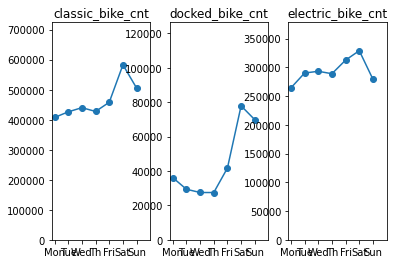

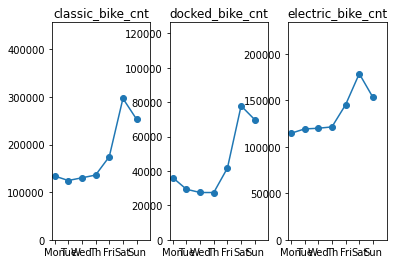

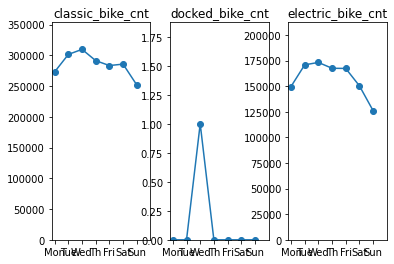

In [15]:
plot_wkd_stat(summary_dict['wkd_dict']['overall'], [['classic_bike_cnt', 'docked_bike_cnt', 'electric_bike_cnt']])
plot_wkd_stat(summary_dict['wkd_dict']['casual'], [['classic_bike_cnt', 'docked_bike_cnt', 'electric_bike_cnt']])
plot_wkd_stat(summary_dict['wkd_dict']['member'], [['classic_bike_cnt', 'docked_bike_cnt', 'electric_bike_cnt']])

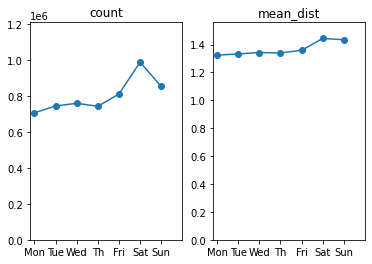

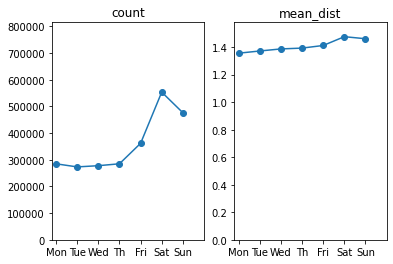

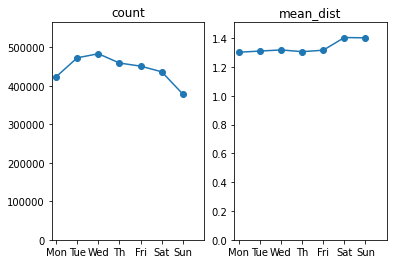

In [16]:
plot_wkd_stat(summary_dict['wkd_dict']['overall'], [['count', 'mean_dist']])
plot_wkd_stat(summary_dict['wkd_dict']['casual'], [['count', 'mean_dist']])
plot_wkd_stat(summary_dict['wkd_dict']['member'], [['count', 'mean_dist']])

In [17]:
casual = df.loc[df['member_casual'] == 'casual']
casual.groupby('rideable_type').agg({'rideable_type': 'count'})

,rideable_type
rideable_type,
classic_bike,1250023
docked_bike,309946
electric_bike,951901


In [18]:
member = df.loc[df['member_casual'] == 'member']
member.groupby('rideable_type').agg({'rideable_type': 'count'})

,rideable_type
rideable_type,
classic_bike,1997271
docked_bike,1
electric_bike,1105402


In [19]:
df.groupby('rideable_type').agg({'rideable_type': 'count'})

,rideable_type
rideable_type,
classic_bike,3247294
docked_bike,309947
electric_bike,2057303


In [24]:
# ride observations over 12 hours
df.loc[df['tr_time_nano'] > 4.32e13]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_miles,travel_time,tr_time_nano,weekday_num
18,DC41683B55F3110C,classic_bike,2021-01-01 00:35:51,2021-01-01 14:05:57,Lincoln Ave & Roscoe St,TA1307000138,Dodge Ave & Main St,E011,41.943340,-87.670970,42.034632,-87.699188,casual,6.472051,0 days 13:30:06,48606000000000,4
200,23026C4233A298B1,docked_bike,2021-01-01 06:00:48,2021-01-03 19:16:01,Wood St & Taylor St (Temp),13285,Keystone Ave & Montrose Ave,KA1504000164,41.869265,-87.673731,41.961108,-87.728970,casual,6.952382,2 days 13:15:13,220513000000000,4
2162,2C9FB5EAAC0E39BE,docked_bike,2021-01-02 14:21:57,2021-01-03 13:45:11,Buckingham Fountain,15541,Kingsbury St & Kinzie St,KA1503000043,41.876511,-87.620548,41.889177,-87.638506,casual,1.272500,0 days 23:23:14,84194000000000,5
2476,28373655A2F50705,docked_bike,2021-01-02 15:57:58,2021-01-03 17:37:11,Morgan St & Lake St,TA1306000015,Malcolm X College,631,41.885483,-87.652305,41.877618,-87.673895,casual,1.236460,1 days 01:39:13,92353000000000,5
3239,D7F78A8E104B86D1,docked_bike,2021-01-02 22:05:08,2021-01-16 16:31:03,Blue Island Ave & 18th St,13135,Paulina St & Howard St,515,41.857556,-87.661535,42.019159,-87.673573,casual,11.182942,13 days 18:25:55,1189555000000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5692301,89F04C89178D2898,classic_bike,2022-01-30 10:30:32,2022-01-31 09:28:01,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939478,-87.663748,41.940000,-87.650000,member,0.707489,0 days 22:57:29,82649000000000,6
5692399,ED144BF52E321C25,classic_bike,2022-01-30 11:02:03,2022-01-31 09:28:01,Southport Ave & Belmont Ave,13229,NaN,NaN,41.939478,-87.663748,41.940000,-87.650000,member,0.707489,0 days 22:25:58,80758000000000,6
5692857,FCB78CF08B8BAE03,classic_bike,2022-01-30 13:19:59,2022-01-31 09:28:01,Southport Ave & Waveland Ave,13235,NaN,NaN,41.948150,-87.663940,41.940000,-87.650000,member,0.911228,0 days 20:08:02,72482000000000,6
5693031,5133A886AB372F53,classic_bike,2022-01-30 14:04:05,2022-01-31 09:28:01,Pine Grove Ave & Irving Park Rd,TA1308000022,NaN,NaN,41.954383,-87.648043,41.940000,-87.650000,member,0.998856,0 days 19:23:56,69836000000000,6
